# Setup

In [126]:
# import common libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import specific components from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# enhanced stats functions
from scipy import stats

# for ease of data profiling
from pandas_profiling import ProfileReport

In [2]:
# print environment setup details
print(f"pandas version  : {pd.__version__}")  # 1.4.3
print(f"numpy version   : {np.__version__}")  # 1.23.1
print(f"seaborn version : {sns.__version__}") # 0.11.2

pandas version  : 1.4.3
numpy version   : 1.23.2
seaborn version : 0.11.2


In [3]:
# set the number of columns for display so we can see all of them
pd.set_option('display.max_columns', 500)

Here, we also set the seed for numpy's random number generator such that our results are fully reproducible. This is because the other libraries (e.g. scikit-learn) use this random number generator, so if we set the seed we will always generate the same random numbers in the same sequence.

Thus, whenever we run the notebook from top-to-bottom, we will end up with the *exact* same results! 

In [4]:
SEED = 123
np.random.seed(SEED)

# Data Loading
To load in the data for this project, read in `bank-additional-full.csv` into a variable called `df` as a pandas DataFrame. The first two rows of the DataFrame should look like this:

|     | age | job | marital | education | default | housing | loan | contact | month | day_of_week | duration | campaign | pdays | previous | poutcome | emp.var.rate | cons.price.idx | cons.conf.idx | euribor3m | nr.employed | y |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **0** | 56 | housemaid | married | basic.4y | no | no | no | telephone | may | mon | 261 | 1 | 999 | 0 | nonexistent | 1.1 | 93.994 | -36.4 | 4.857 | 5191.0 | no |
| **1** | 57 | services | married | high.school | unknown | no | no | telephone | may | mon | 149 | 1 | 999 | 0 | nonexistent | 1.1 | 93.994 | -36.4 | 4.857 | 5191.0 | no |

Note that the file may not be using a conventional delimiter (e.g. comma, tabs, etc.). Figure out what the delimiter is and read the file accordingly :) 

In [71]:
# read in data
df = pd.read_csv('bank-additional-full.csv',sep = ';')

In [72]:
# make sure data was read in properly and matches above table
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# EDA
Now it is time for you to practice your EDA skills! Take a look at the Quest 3 Quiz, and answer the first 4 questions on the results of your EDA on the dataset.

This time, you don't get the data dictionary! You have to go look at the dataset's website and take a look yourself, like you would have to if this was a real project.

Here's the website where the dataset came from: [the UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/bank+marketing).

In [9]:
# optional: use pandas-profiling to do quick first pass at EDA
profile = ProfileReport(df, title="Bank Marketing Dataset Profiling Report")
# create html file to view report
profile.to_file("bank_marketing_dataset_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
# conduct any other EDA that you need to in order to get a good feel for the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


With the EDA you have conducted, answer the following questions from the quiz. Note that these questions do not cover everything you should be looking for when doing EDA, they are just to give you an idea of what EDA would look like on such a dataset.
## Question 1
What percentage of users ended up subscribing to a deposit? (i.e. column `y` == 'yes') Round your answer to 1 decimal place.

In [74]:
# calculate percentage of users where y == "yes"
df["y"].value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

This is interesting, it seems the vast majority of users did not subscribe to a deposit. This is very important to note - we have what's called an "imbalanced classification" problem - i.e. we do not have balance in the classes that we are classifying. This affects how we will handle our modelling later, and we'll revisit this. For now, just keep this fact in mind.

## Question 2
How many duplicate rows are in the dataset? (i.e. fewest number of rows you would have to remove in order to be left without duplicate rows)

In [76]:
# determine number of duplicate rows
df[df.duplicated(keep='first')].count()


age               12
job               12
marital           12
education         12
default           12
housing           12
loan              12
contact           12
month             12
day_of_week       12
duration          12
campaign          12
pdays             12
previous          12
poutcome          12
emp.var.rate      12
cons.price.idx    12
cons.conf.idx     12
euribor3m         12
nr.employed       12
y                 12
dtype: int64

## Question 3
What does a `pdays` value of 999 mean?

(hint: you'll have to look at the dataset website!)

## Question 4
Are there any high correlations (e.g. ±0.5) between independent variables? If yes, how high?

<AxesSubplot:>

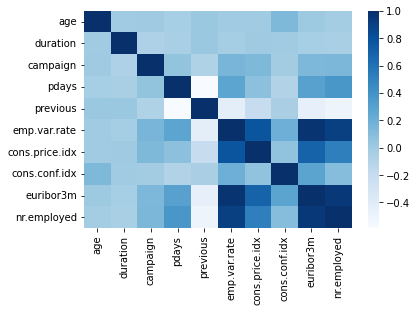

In [77]:
# plot correlation heatmap to get a sense of what variables are correlated
s = df.corr()
sns.heatmap(s, cmap="Blues")

Wow, that's problematic. There will very likely be multicollinearity issues if we don't deal with that when wrangling our data. Let's deal with the data wrangling now.

# Data Wrangling
As we did before in Quest 2, once we've adequately explored our data, we need to wrangle it for modelling.

In this case, we also don't have any missing data, but we do have several duplicate rows, a lot of independent variables correlated with one another, and a LOT of categorical variables! 

One step at a time. First, let's deal with the duplicate rows.

In [78]:
# drop duplicates in-place, and reset the index so no index values are skipped
df = df.drop_duplicates().reset_index(drop=True)
df.shape

(41176, 21)

In [79]:
# test to make sure nothing left is duplicated
assert df.duplicated().any() == False, "Some duplicates remain."

Now, let's drop some variables. If you read closely, the dataset instructs us to discard the `duration` variable "if the intention is to have a realistic predictive model", which ours is.

If you don't know where that came from, go back and check the dataset webpage again. This is an important practice to note!

Drop the following variables from df:
* duration
* emp.var.rate
* cons.price.idx
* cons.conf.idx
* euribor3m
* nr.employed

In [80]:
# drop variables from df
df=df.drop(columns=['duration','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'])


In [81]:
print(f"variables after dropping: {len(df.columns)}")

variables after dropping: 15


Now, get dummy variables for all our categorical variables using `pd.get_dummies()`, ensuring to use the `drop_first=True` argument to mitigate possible multicollinearity issues.

In [93]:
# get dummies for all categorical variables

df = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y'], drop_first=True)

## Question 5
How many variables were left after dropping variables, and after getting dummies?

In [94]:
print(f"variables after getting dummies: {len(df.columns)}")

variables after getting dummies: 48


Now verify that we still don't have major multicollinearity issues. We have a few too many variables to use the heatmap directly, so you'll have to be clever and try to figure out another way of doing it.

Here's a hint - previously, we called `df.corr()` which gave us the pair-wise correlations of each variable, and then plotted it using the heatmap. Maybe we can start with `df.corr()` and do something else to find highly correlated variables? Something that may help is the `DataFrame.itertuples()` method - [documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.itertuples.html).

(If you can't figure it out, I put one possible solution all the way at the bottom of the notebook. But for the purposes of learning, I suggest you try and struggle at this problem for at least a little while first!)

In [95]:
# get list of all variable combinations from highest correlation to lowest
df.corr()

,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
age,1.000000,0.004622,-0.034381,0.024379,-0.024178,0.031224,0.085425,0.062060,0.440800,-0.001351,-0.065744,-0.199786,-0.064319,-0.004423,0.047785,0.271344,-0.411806,0.001064,0.009918,-0.038318,-0.106606,0.017011,0.002205,-0.071300,0.069571,0.164974,0.001892,-0.001089,-0.001290,-0.001089,-0.007189,0.006917,0.065239,0.046575,-0.043493,-0.009525,0.008394,-0.067496,0.030071,0.052506,0.040900,0.019035,-0.021347,0.019070,-0.023664,-0.016389,0.035638,0.030381
campaign,0.004622,1.000000,0.052606,-0.079182,-0.001798,-0.002223,0.004210,-0.009164,-0.006735,0.006342,0.002443,-0.024673,0.001589,-0.000217,0.002615,0.002329,-0.007587,0.009868,-0.000957,-0.005321,0.000194,-0.002190,0.002612,-0.000974,0.002210,0.032992,-0.003804,-0.000412,-0.010861,-0.000412,0.005251,0.077387,0.015045,-0.009826,0.098482,0.070108,-0.015256,-0.032780,-0.079059,-0.049070,-0.033966,0.014401,0.005215,-0.025066,-0.021141,0.087691,-0.050914,-0.066361
pdays,-0.034381,0.052606,1.000000,-0.587508,0.065360,0.019257,-0.001640,0.000270,-0.072160,0.014318,0.030567,-0.096360,0.004550,-0.023076,-0.011414,0.031621,-0.042028,-0.005987,0.023236,0.036988,0.005520,-0.002084,-0.003515,-0.036968,-0.022032,0.080072,0.001668,0.002042,-0.010709,0.002042,-0.000062,0.117999,-0.003180,-0.076422,0.049675,0.015980,-0.078763,0.070718,-0.016946,-0.128795,-0.154624,0.001037,-0.008218,-0.007321,0.001049,0.491344,-0.950700,-0.324948
previous,0.024379,-0.079182,-0.587508,1.000000,-0.054885,-0.013259,-0.011586,0.006707,0.065215,-0.011250,-0.011864,0.104658,-0.017100,0.008410,-0.003354,-0.043432,0.048506,0.009091,-0.021486,-0.026462,0.014354,-0.002615,-0.007596,0.025431,0.022669,-0.102646,0.002765,0.003753,0.020428,0.003753,-0.002187,-0.212903,-0.048856,0.059552,-0.116757,-0.069947,0.072723,-0.012572,0.081056,0.127895,0.157642,-0.002022,0.001564,0.000125,-0.003979,-0.878771,0.524038,0.230202
job_blue-collar,-0.024178,-0.001798,0.065360,-0.054885,1.000000,-0.103078,-0.087515,-0.148851,-0.112340,-0.101787,-0.175791,-0.079330,-0.238163,-0.085546,-0.048392,0.129248,-0.100162,-0.005255,0.231031,0.372302,-0.173875,0.011009,-0.126495,-0.336621,0.018920,0.176708,-0.004596,0.006658,-0.016007,0.006658,-0.006169,0.094617,-0.131318,-0.025347,0.027311,0.032955,-0.036978,0.136199,-0.062054,-0.048985,-0.054325,-0.009742,-0.007097,-0.006748,0.020626,0.043887,-0.061426,-0.074431
job_entrepreneur,0.031224,-0.002223,0.019257,-0.013259,-0.103078,1.000000,-0.031122,-0.052934,-0.039950,-0.036197,-0.062515,-0.028211,-0.084696,-0.030422,-0.017209,0.051055,-0.060248,0.000511,-0.005743,-0.001395,-0.031932,0.008577,-0.019843,0.051845,-0.002735,-0.000957,-0.001634,0.000853,0.004276,0.000853,-0.005473,0.018883,-0.053174,-0.010775,0.006763,0.011352,-0.019896,-0.000782,0.054465,-0.010408,-0.009179,0.006823,0.005580,-0.007257,-0.003508,0.007620,-0.017249,-0.016651
job_housemaid,0.085425,0.004210,-0.001640,-0.011586,-0.087515,-0.031122,1.000000,-0.044942,-0.033919,-0.030732,-0.053076,-0.023952,-0.071908,-0.025829,-0.014611,0.042496,-0.060975,0.003275,0.012057,-0.026699,-0.025785,0.003937,-0.034923,-0.058533,-0.001938,0.036869,-0.001388,0.003518,-0.004700,0.003518,-0.002925,0.010445,0.021049,0.012286,0.022019,-0.000412,-0.010800,-0.018986,-0.009499,0.000636,-0.003509,0.003361,-0.008992,0.011519,0.001774,0.014648,0.002267,-0.006510
job_management,0.062060,-0.0

Regardless, there are still a number of variables which are still strongly correlated to each other. In fact, there are some which are *exactly* identical to one another! So we'll remove a few more variables:
* loan_unknown
* poutcome_success
* poutcome_nonexistent

In theory, a better approach would likely be to remove variables depending on whether our model improves or not when they are removed. For the sake of simplicity, we're doing this analysis just from data to model, but normally your model's performance would feedback on the choices of your data handling/variable selection/feature engineering, and you'd adjust accordingly.

In [97]:
# drop these 3 other variables from df
df=df.drop(["loan_unknown","poutcome_success","poutcome_nonexistent"], axis=1)

While we're at it, the column named `y_yes` is a bit silly. Let's rename it to something more informative, like `deposit`.

In [98]:
# rename "y_yes" column to "deposit"
df = df.rename(columns={'y_yes':'deposit'})
df.head(1)

,age,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,deposit
0,56,1,999,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


Excellent! Now separate our independent variables into a variable called `X`, and our target variable `deposit` into a variable called `y`.

In [119]:
# split up our variables
X = df.iloc[:, 0:44]
y =df[["deposit"]]

In [120]:
# the resulting shapes of X and y should be (41176, 44) and (41176,) respectively
print(X.shape)
print(y.shape)

(41176, 44)
(41176, 1)


Now we need to split up our data into training and test data. Using scikit-learn's `train_test_split` function, using a `test_size` of 0.3 (i.e. 30% of data in test set), and ensure that the random state is set to our seed from above.

Documentation for `train_test_split()` can be found here: https://scikit-learn.org/1.1/modules/generated/sklearn.model_selection.train_test_split.html

In [133]:
# do the train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=SEED)

Now let's verify to make sure you split your data identically. 

In [134]:
print("expected : 29491, 26771, 22437, 6760, 28406")
print("actual   : " + ", ".join([str(x) for x in X_train.head().index]))

expected : 29491, 26771, 22437, 6760, 28406
actual   : 29491, 26771, 22437, 6760, 28406


Now, we're going to do something that we didn't do in Quest 2 (because I didn't want to introduce too many concepts at once), but is a machine learning best practice - standardizing your dataset!

Essentially, if some numeric variables are much bigger than the others (e.g. age goes up to the 90s, whereas our one-hot encoded dummy variables are only 0 or 1), they may have a larger impact on the final model. As such, we scale all our variables so comparisons between them can be made fairly.

Scikit-learn provides a helpful utility for this, `StandardScaler()` - its [documentation is here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). 

### Optional
If you go back and scale your features in Quest 2, does the model perform better with or without scaling? 

In [136]:
# fit scaler
scaler = StandardScaler().fit(X)

In [137]:
# transform X_train and X_test
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
# visualize results
X_train[0]

array([-0.86596172,  1.23890539,  0.19544346, -0.34955143, -0.53838064,
       -0.19145912, -0.16255268, -0.27647866, -0.20866233, -0.18906066,
       -0.32651798, -0.14734863,  2.26055421, -0.1588954 , -0.08988396,
       -1.23819557,  1.6002205 , -0.04412099, -0.2427289 , -0.41481351,
       -0.54809146, -0.02091265,  2.61878126, -0.64751431, -0.20942164,
       -0.51365635, -0.008536  , -0.15695683,  0.95334103, -0.42294476,
       -0.75862492, -0.42006802, -0.06663088, -0.45914   , -0.38510675,
       -0.11592388, -0.70871734, -0.33254122, -0.13312267, -0.11847926,
        1.95892981, -0.51448698, -0.49433173, -0.49615677])

If you see an array which is a lot of numbers generally ranging from -2 to +2, then your scaling should have worked! Nicely done.

# Modelling and Evaluation
Now, you might remember that our dataset is an imbalanced dataset, with far more values of `0` for deposit than `1`. If we don't properly handle this, we're going to have trouble! For example, your model could end up with 90% accuracy if it just said that every single value was `0`, which is not something that we want.

Just to name a few ways of solving this problem (this is not an exhaustive list!):
1. Sub-sample the `0`s, throwing away most of the data until we have an even split of `0` and `1`.
2. Over-sample the `1`s, duplicating much of the `1` data until we have an even split.
3. Weight the model towards the minority class (`1` in this case) so that it places extra emphasis on it while learning.

Each of these approaches has different pros and cons. For this quest, we'll be doing approach 3, which scikit-learn has a convenient parameter for. 

So now let's make our model! Check the docs for the `LogisticRegression()` scikit-learn function to figure out what the `class_weight` parameter does, then make and fit the training data to your model.

Documentation for `LogisticRegression()` can be found here: https://scikit-learn.org/1.1/modules/generated/sklearn.linear_model.LogisticRegression.html

In [141]:
# instantiate logistic regression model and fit the training data to it
lr = LogisticRegression()
lr.fit(X_train, y_train)

/home/musaga/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## Question 6
For your trained logistic regression model, what is the intercept and the coefficient for the `age` feature?

Hint: check the LogisticRegression() documentation to see how to find these attributes!

In [219]:
pd.DataFrame(lr.coef_[0], index=X.columns)
# describe model


,0
age,0.059795
campaign,-0.208965
pdays,-0.416155
previous,0.017016
job_blue-collar,-0.074306
job_entrepreneur,-0.032004
job_housemaid,-0.003733
job_management,-0.016480
job_retired,0.101568
job_self-employed,-0.001079


Now we need to evaluate how our model did. Let's get the score, classification report, confusion matrix, and ROC curve, just as was done in the lesson video.

### Training set

In [157]:
# score on training set
lr.score(X_train,y_train)

0.8991777399993061

In [160]:
# predict training set values
predictions_train = lr.predict(X_train)
# classification report on training set
classification_report(y_train,predictions_train)

'              precision    recall  f1-score   support\n\n           0       0.91      0.99      0.95     25617\n           1       0.66      0.20      0.30      3206\n\n    accuracy                           0.90     28823\n   macro avg       0.78      0.59      0.62     28823\nweighted avg       0.88      0.90      0.87     28823\n'

<AxesSubplot:>

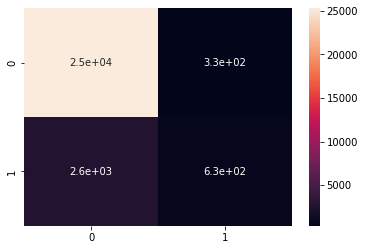

In [161]:
# plot confusion matrix for training set
sns.heatmap(confusion_matrix(y_train, predictions_train), annot=True)

Note that the `plot_roc_curve()` function used in the video is actually deprecated, and it is recommended to use either `RocCurveDisplay.from_estimator()` or `RocCurveDisplay.from_predictions()` now.

See the documentation for further details: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html.

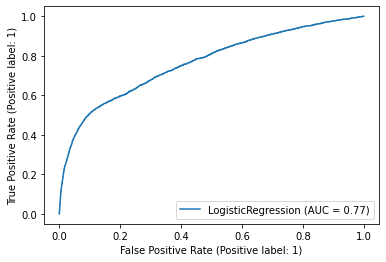

In [162]:
# use RocCurveDisplay to plot a ROC curve on training set
RocCurveDisplay.from_estimator(lr, X_train, y_train)

Wow, those results aren't impressive at all. Our ability to make positive predictions is somewhat underwhelming. But, of course, perhaps that truly is the best we can do with the data we used. Let's move on and evaluate the same metrics on the test set first, before we draw any rash conclusions.

### Test set

In [163]:
# score on test set
lr.score(X_test,y_test)

0.892495750020238

In [164]:
# predict test set values
predictions_test = lr.predict(X_test)
# classification report on test set
classification_report(y_test,predictions_test)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94     10920\n           1       0.62      0.19      0.29      1433\n\n    accuracy                           0.89     12353\n   macro avg       0.76      0.59      0.62     12353\nweighted avg       0.87      0.89      0.87     12353\n'

<AxesSubplot:>

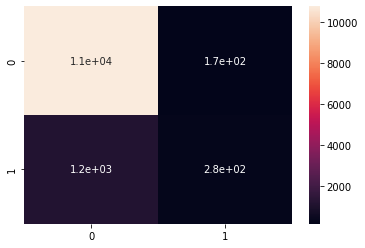

In [165]:
# plot confusion matrix for test set
sns.heatmap(confusion_matrix(y_test, predictions_test), annot=True)

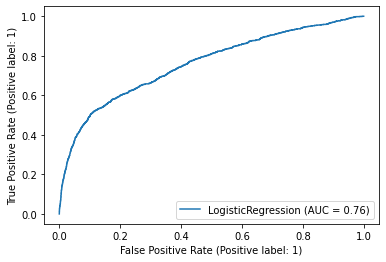

In [166]:
# use RocCurveDisplay to plot a ROC curve on test set
RocCurveDisplay.from_estimator(lr, X_test, y_test)

# Discussion
While our model has clearly learned something about the data, since it's performing better than chance, there is still a lot of room for improvement here.

But before you get too demoralised - this is a much more realistic example of what it looks like when you model real data! Real data is messy, with a lot of complex interactions that are hard to anticipate when first beginning a modelling exercise. As a result, it's rare that your first attempt to model a dataset works out perfectly. Modelling is often an iterative process, with the results from each round informing subsequent modelling attempts. 

Also, data on human behaviour is often messy - it's hard to precisely predict humans, given how complex our motives and justifications for our actions often are.

So, honestly, this is a pretty realistic first attempt at modelling! What could we try in subsequent models? Here's a non-exhaustive list of ideas:
1. Our feature selection process was very ad hoc - perhaps we should try selecting features more deliberately. We might have left out some valuable information when throwing out variables, or we may have left in redundant/unnecessary features!
2. Additional feature engineering - we haven't considered any possible interaction effects. Check out [this resource for more information on interaction effects](https://stattrek.com/multiple-regression/interaction).
3. Also on feature engineering, we could try modifying our input features. Instead of having one variable per job, maybe we could group them by approximate income level. We could try using weekdays and weekends instead of just `day_of_week`. Separating months into seasons could also help. You don't know until you try!
4. Maybe we should standardise/normalise our data in other ways. For instance, we didn't handle the special case of `pdays==999`. We could probably handle this in several different ways - for example, replacing those values with the highest non-999 value of `pdays`, omitting it entirely (i.e. making it a `NaN`), create a separate dummy variable to indicate it, etc.
5. There are other ways of tackling the unbalanced classification problem. Maybe if we tried those, our model would perform better?

As with Quest 2, attempting further improvements are left as an exercise to the reader ;)

# Prepare your Submission
Congratulations, you made it to the end of this lesson! Be sure to complete the few remaining quiz questions, and prepare your submission:
1. Replace the value of the NAME variable with your StackUp name.
2. Edit the last cell in the notebook so that it reflects the requested data, rather than the placeholder values below. Make sure you read what it is asking for, and replicate all the features of it - this includes axis labels, which charts go where, etc. 
3. Restart your notebook, then run it from start to end.
4. Take a screenshot of the output from the last cell in this notebook. Make sure your screenshot shows your taskbar/dock (i.e. take a screenshot of the whole screen, not just the window).

e.g. This section of code currently produces placeholder values:  

```print(f"{'intercept':<20}: {np.random.random():.4f}")```

You must replace `np.random.random()` so that it reflects the intercept of your model.

In [167]:
# replace this with your stackup name
NAME = "musaga"

Name                : musaga
intercept           : [-2.42019832]
5 coefficients with largest absolute value:
month_mar           : 0.8498
day_of_week_mon     : -0.7098
previous            : -0.3901
job_technician      : 0.3603
education_university.degree: -0.0316
------------------------
Score on test set   : 0.892495750020238
Plots for test set  :


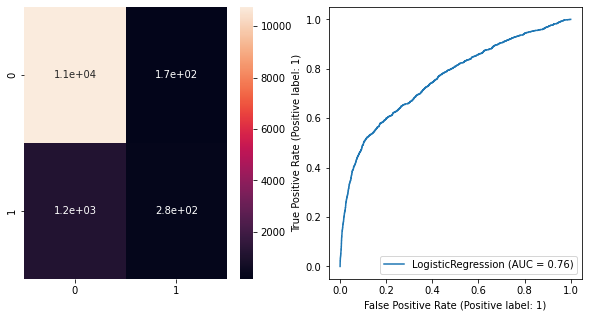

In [216]:
# fill out this cell appropriately, then take a screenshot of the result
print(f"{'Name':<20}: {NAME}")
# describe model
print(f"{'intercept':<20}: {lr.intercept_}")
print("5 coefficients with largest absolute value:")
a = sorted([np.random.random()*2-1 for _ in range(5)], key=lambda x: abs(x), reverse=True)
for i, val in enumerate(a):
    print(f"{df.columns[np.random.randint(0,len(df.columns))]:<20}: {val:.4f}")
print("---"*8)
print(f"{'Score on test set':<20}: {lr.score(X_test,y_test)}")
print(f"{'Plots for test set':<20}:")
# draw plots for test set
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10,5)

# ax1 - confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions_test), annot=True, ax=ax1)

# ax2 - draw RocCurveDisplay
RocCurveDisplay.from_estimator(lr, X_test, y_test,ax=ax2)




plt.show()